# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [96]:
#Seu código de importação aqui
df = pd.read_csv('Atividade_modulo14.csv', delimiter = ',')
df.head()

,customerID,Genero,Idoso,Casado,Dependetes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Streaming_TV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.950000,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),65.607563,1840.75,No
4,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No,No internet service,One year,Mailed check,65.607563,1022.95,No


In [97]:
df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependetes             object
Tempo_como_Cliente      int64
Servico_Telefonico     object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
Streaming_TV           object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [98]:
#A)
df.describe()
# temos 4 variaveis quantitativas, sendo a 'Idoso' na verdade uma variavel boleana de 0 e 1;
# a variavel 'Pagamento_Mensal' apresenta uma distribuiçõa normal, com a media e mediana iguais.

#B)
#Total_pago é a variavel com maior diferença entre média e mediana, provavelmente referente a outliers

,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,65.607563,2290.087178
std,0.368135,24.636885,27.984700,2264.585643
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,45.400000,402.337500
50%,0.000000,29.000000,65.607563,1402.900000
75%,0.000000,56.000000,87.712500,3867.162500
max,1.000000,72.000000,118.650000,8564.750000


In [99]:
#C)

Text(0, 0.5, 'Valores')

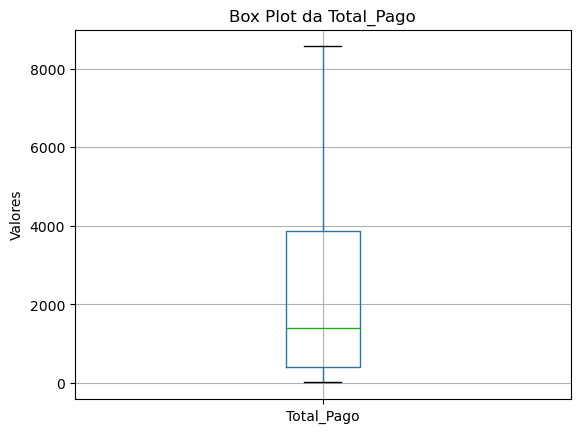

In [100]:
df.boxplot(column='Total_Pago')
plt.title('Box Plot da Total_Pago')
plt.ylabel('Valores')

Text(0, 0.5, 'Valores')

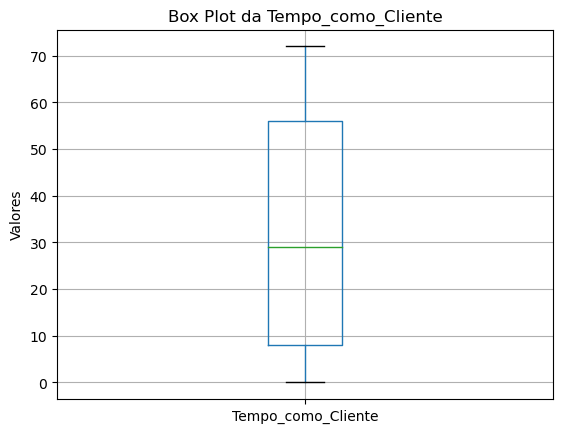

In [101]:
df.boxplot(column='Tempo_como_Cliente')
plt.title('Box Plot da Tempo_como_Cliente')
plt.ylabel('Valores')

Text(0, 0.5, 'Valores')

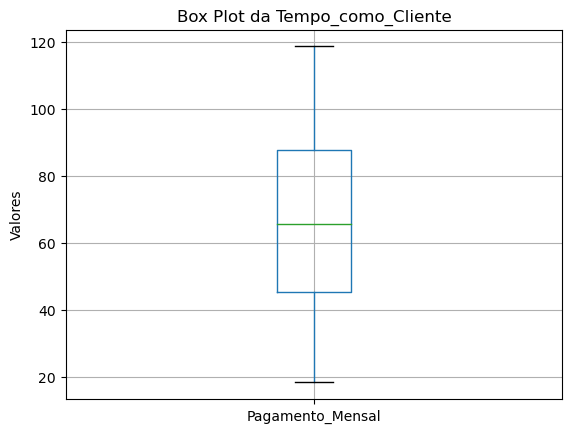

In [102]:
df.boxplot(column='Pagamento_Mensal')
plt.title('Box Plot da Tempo_como_Cliente')
plt.ylabel('Valores')

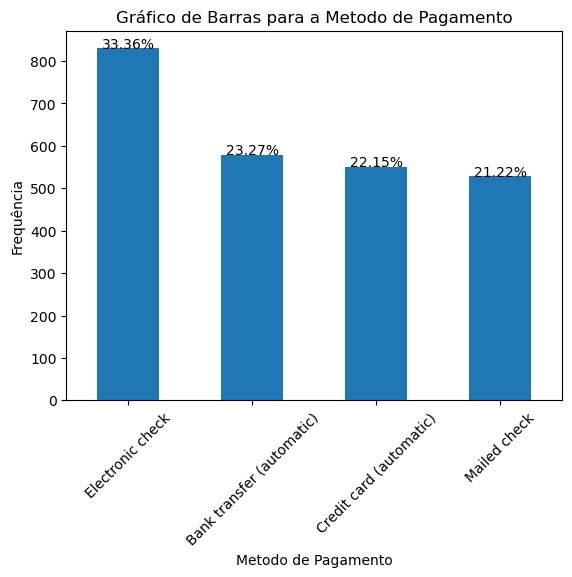

In [103]:
contagem = df['PaymentMethod'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100


ax = contagem.plot(kind='bar')

# Adicionando pora procentagem nas barras
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Metodo de Pagamento')
plt.xlabel('Metodo de Pagamento')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

plt.show()

In [104]:
#Dados bem equilibrados para o metedo de pagamento, com maior predominancia no cheque eletrônico

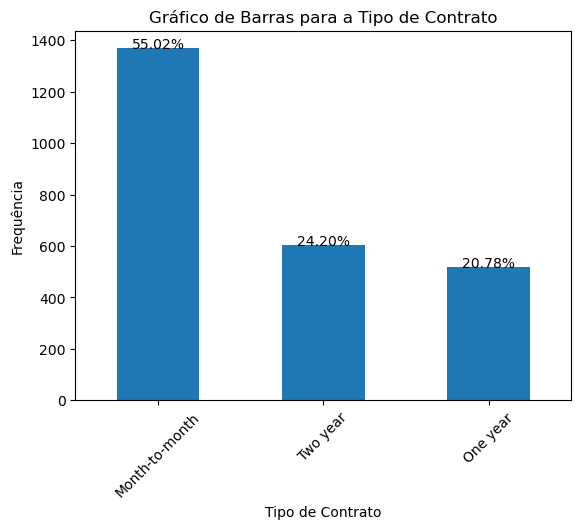

In [105]:
contagem = df['Tipo_Contrato'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100


ax = contagem.plot(kind='bar')

# Adicionando pora procentagem nas barras
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

plt.show()

Text(0, 0.5, 'Quantidade')

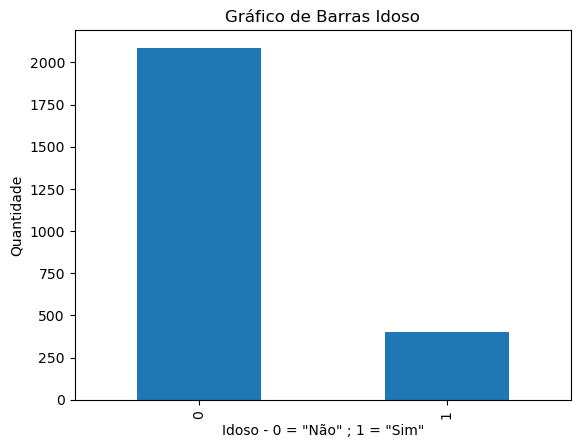

In [106]:
contagem_idoso = df['Idoso'].value_counts()
porcentagem = (contagem_idoso / contagem_idoso.sum()) * 100

ax = contagem_idoso.plot(kind='bar')
plt.title('Gráfico de Barras Idoso')
plt.xlabel('Idoso - 0 = "Não" ; 1 = "Sim"')
plt.ylabel('Quantidade')

In [107]:
count = df['Idoso'].value_counts()
(count / count.sum()) * 100

0    83.842444
1    16.157556
Name: Idoso, dtype: float64

In [108]:
count = df['Churn'].value_counts()
(count / count.sum()) * 100

No     73.995177
Yes    26.004823
Name: Churn, dtype: float64

In [109]:
#D) ambas variaveis estão desbamlaceadas

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


In [110]:
#Não identifiquei outliers; o unico que é apontando em um boxplot seria o "Idoso", mas se tratando de um booleano obviamente não se aplica

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

In [111]:
df.head()

,customerID,Genero,Idoso,Casado,Dependetes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Streaming_TV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.950000,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.850000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),65.607563,1840.75,No
4,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No,No internet service,One year,Mailed check,65.607563,1022.95,No


In [112]:
#Qual relação entre método de pagamento e churn
fig = px.histogram(df, x='Churn', color='PaymentMethod', barmode='stack')

fig.update_layout(title='Relação entre Churn e Método Pagamento',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Método Pagamento')
fig.show()

In [113]:
#achei que teriamos uma correlação entre metodos de pagamento automatico e churn, mas parecem bem equilibrados. 
#Porém também as menores ocorrências de churn são nos pagamentos automicos e a maior no cheque eletrônico

In [114]:
#Qual relação entre idade e churn

df_grouped = df.groupby(['Churn', 'Idoso']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100


fig = px.bar(df_grouped, x='Churn', y='percent', color='Idoso', barmode='stack')

fig.update_layout(title='Relação entre Churn e Idade',
                  yaxis_title='Porcentagem',
                 )
fig.show()

In [115]:
# Relação de idoso e churn mostra uma tendencia maior de churn nos idosos

In [119]:
##Qual relação entre tipo de contrato e churn

df_grouped = df.groupby(['Churn', 'Tipo_Contrato']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='Tipo_Contrato', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Tipo_Contrato': 'Tipo Contrato'})

fig.update_layout(title='Relação entre Churn e Tipo_Contrato',
                  yaxis_title='Porcentagem',
                  legend_title='Tipo_Contrato')
fig.show()

In [ ]:
#Grande Relação entre tipo de contrato e churn, com grande incidência de churn nos menores contratos

In [120]:
#Qual relação entre método de pagamento e situação conjugal
fig = px.histogram(df, x='Churn', color='Casado', barmode='stack')

fig.update_layout(title='Relação entre Churn e situação conjugal',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Casado')
fig.show()

In [124]:
#Ha discripância entre o valor medio pago e o tipo de contrato?
media_pagamento = df.groupby('Tipo_Contrato')['Pagamento_Mensal'].mean().reset_index()
fig = px.bar(media_pagamento, 
             x='Tipo_Contrato', 
             y='Pagamento_Mensal', 
             title='Média de Pagamento Mensal por Tipo de Contrato')

fig.update_layout(xaxis_title='Tipo de Contrato',
                  yaxis_title='Média do Pagamento Mensal')

In [ ]:
#B)
# Acredito que o tipo de contrato e o método de pagamento são altamente relevantes para o churn, pois ambos influenciam na decisão de prosseguir com o pagamento e o serviço